Faça a leitura do arquivo movies.csv
column_names = ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'gross', 'movie_title', 'num_user_for_reviews', 'country', 'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre']

#1 Qual o filme com o maior lucro?
#2 Qual o filme que deu o maior prejuízo
#3 Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)
#4 Uma plotagem do genero do filme.
#5 Quais os 10 melhores filmes(olha aí a lista de indicação do FDS)
#6 Qual o Genero mais popular e menos popular?
#7 Existe relação entre os melhores filme e seu Budget?
#8 Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?
#9 Mostre num gráfico a quantidade de filmes ao passar do ano

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('./movies.csv', delimiter='|', header=None, names= ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'gross', 'movie_title', 'num_user_for_reviews', 'country', 'content_rating', 'budget', 'title_year', 'imdb_score', 'genre'])
df.replace('?', np.nan, inplace=True)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'].replace(',', '', regex=True))
df.head()

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,genre
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,237000000.0,2009.0,7.9,Action
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,300000000.0,2007.0,7.1,Action
2,Color,Sam Mendes,602.0,148.0,200074175.0,Spectre,994.0,UK,PG-13,245000000.0,2015.0,6.8,Action
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,250000000.0,2012.0,8.5,Action
4,NaN,Doug Walker,NaN,NaN,NaN,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,7.1,Documentary


In [15]:
#1 Qual o filme com o maior lucro?
df['lucro'] = df['gross'] - df['budget']
df.sort_values(by='lucro', ascending=False).head(1)

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,genre,lucro
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,237000000.0,2009.0,7.9,Action,523505847.0


In [16]:
#2 Qual o filme que deu o maior prejuízo
df.sort_values(by='lucro', ascending=True).head(1)

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,genre,lucro
5,Color,Andrew Stanton,462.0,132.0,73058679.0,John Carter,738.0,USA,PG-13,263700000.0,2012.0,6.6,Action,-190641321.0


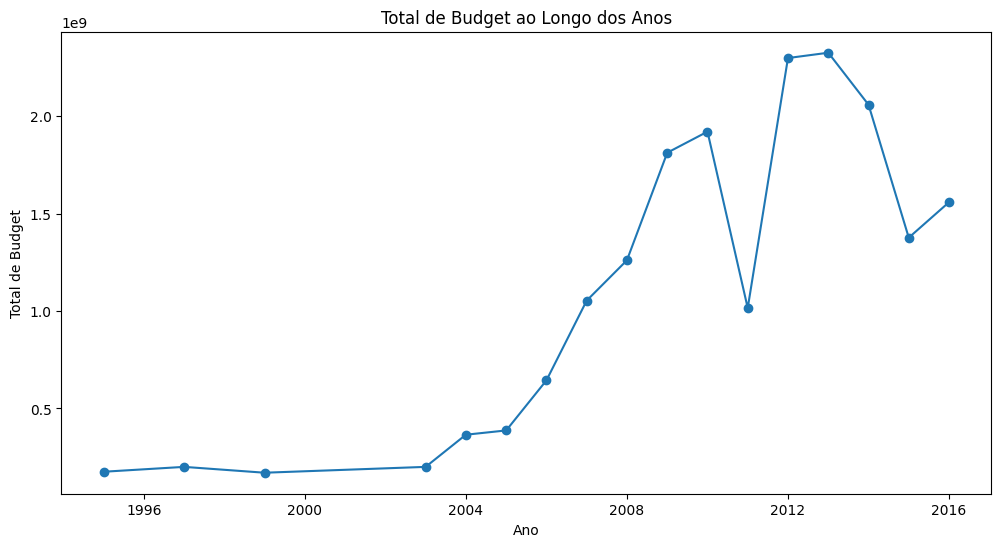

In [17]:
#3 Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)
df['title_year'] = pd.to_datetime(df['title_year'].astype(str).str.split('.').str[0], format='%Y') 

budget_per_year = df.groupby('title_year')['budget'].sum().dropna()

plt.figure(figsize=(12, 6))
plt.plot(budget_per_year.index, budget_per_year.values, marker='o', linestyle='-')

plt.title('Total de Budget ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Total de Budget')

plt.show()

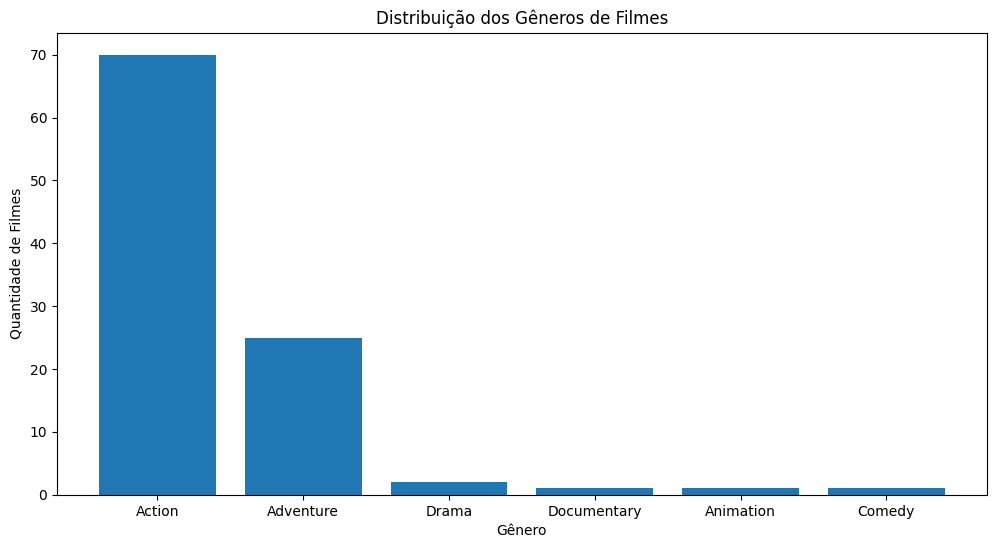

In [18]:
#4 Uma plotagem do genero do filme.
genre_counts = df['genre'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values)

plt.title('Distribuição dos Gêneros de Filmes')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Filmes')

plt.show()

In [19]:
#5 Quais os 10 melhores filmes(olha aí a lista de indicação do FDS)
df.sort_values(by='imdb_score', ascending=False).head(10)

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,genre,lucro
66,Color,Christopher Nolan,645.0,152.0,533316061.0,The Dark Knight,4667.0,USA,PG-13,185000000.0,2008-01-01,9.0,Action,348316061.0
97,Color,Christopher Nolan,642.0,148.0,292568851.0,Inception,2803.0,USA,PG-13,160000000.0,2010-01-01,8.8,Action,132568851.0
96,Color,Christopher Nolan,712.0,169.0,187991439.0,Interstellar,2725.0,USA,PG-13,165000000.0,2014-01-01,8.6,Adventure,22991439.0
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,250000000.0,2012-01-01,8.5,Action,198130642.0
58,Color,Andrew Stanton,421.0,98.0,223806889.0,WALL·E,1043.0,USA,G,180000000.0,2008-01-01,8.4,Adventure,43806889.0
67,Color,Pete Docter,408.0,96.0,292979556.0,Up,704.0,USA,PG,175000000.0,2009-01-01,8.3,Adventure,117979556.0
78,Color,Pete Docter,536.0,95.0,356454367.0,Inside Out,773.0,USA,PG,175000000.0,2015-01-01,8.3,Adventure,181454367.0
43,Color,Lee Unkrich,453.0,103.0,414984497.0,Toy Story 3,733.0,USA,G,200000000.0,2010-01-01,8.3,Adventure,214984497.0
98,Color,Hideaki Anno,1.0,120.0,NaN,Godzilla Resurgence,13.0,Japan,NaN,NaN,2016-01-01,8.2,Action,NaN
27,Color,Anthony Russo,516.0,147.0,407197282.0,Captain America: Civil War,1022.0,USA,PG-13,250000000.0,2016-01-01,8.2,Action,157197282.0


In [20]:
#6 Qual o Genero mais popular e menos popular?
mais_popular = df['genre'].value_counts().head(1)
menos_popular = df['genre'].value_counts().tail(1)

print(f"O gênero mais popular é {mais_popular.index[0]} com {mais_popular.values[0]} filmes.")
print(f"O gênero menos popular é {menos_popular.index[0]} com {menos_popular.values[0]} filmes.")

O gênero mais popular é Action com 70 filmes.
O gênero menos popular é Comedy com 1 filmes.


In [21]:
#7 Existe relação entre os melhores filme e seu Budget?
filmes_maior_budget = df.sort_values(by='budget', ascending=False)

top_10_budget = filmes_maior_budget[['movie_title', 'budget']].head(10)

print("\nTop 10 Filmes com Maiores Budgets:")
print(top_10_budget)

filmes_maior_nota = df.sort_values(by='imdb_score', ascending=False)

top_10_notas = filmes_maior_nota[['movie_title', 'imdb_score']].head(10)

print("\nTop 10 Filmes com Maiores Notas IMDb:")
print(top_10_notas)


Top 10 Filmes com Maiores Budgets:
                                   movie_title       budget
1    Pirates of the Caribbean: At World's End   300000000.0
5                                 John Carter   263700000.0
7                                     Tangled   260000000.0
6                                Spider-Man 3   258000000.0
3                       The Dark Knight Rises   250000000.0
8                     Avengers: Age of Ultron   250000000.0
10         Batman v Superman: Dawn of Justice   250000000.0
9      Harry Potter and the Half-Blood Prince   250000000.0
20  The Hobbit: The Battle of the Five Armies   250000000.0
27                 Captain America: Civil War   250000000.0

Top 10 Filmes com Maiores Notas IMDb:
                    movie_title  imdb_score
66             The Dark Knight          9.0
97                   Inception          8.8
96                Interstellar          8.6
3        The Dark Knight Rises          8.5
58                      WALL·E          8.4
6

Não existe uma relação direta entre os 10 melhores filmes e os 10 maiores budgets. O único filme que aparece nas duas lista é Captain America: Civil War.

In [ ]:
#8 Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?
df.sort_values(by='imdb_score', ascending=False).head(10)

In [ ]:
df.sort_values(by='budget', ascending=False).head(10)

De acordo com a análise o diretor Christopher Nolan é o direto cujos filmes tem as maiores notas no imdb, porém ele não está na lista dos 10 filmes com maiores budgets. Anothony Russo aparece nas duas listas, com o mesmo filme, na mesma faixa de budget na faixa de 250 milhões, que ocupam a partir do 5º lugar de filmes com maiores budgets. Já o direto Andrew Stanton ocupa o segundo lugar de maior budget, porém seu filme que está entre os 10 melhores avaliados não é o mesmo filme que tem o segundo maior budget.

In [ ]:
#9 Mostre num gráfico a quantidade de filmes ao passar do ano
df['year'] = df['title_year'].dt.year

contagem = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
contagem.plot(kind='bar')
plt.title('Contagem de Títulos por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.grid(axis='y')

plt.show()